# IMDB MOVIE REVIEW SENTIMENT ANALYSIS

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
# Importing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.style.use("ggplot")
import re
import warnings
warnings.filterwarnings('ignore')


### Loading the dataset

In [3]:
reviews_df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
reviews_df = reviews_df.sample(n = 10000, random_state = 42)
display(reviews_df.head())
# checking the shape of our data set
print(reviews_df.shape)
# dropping any duplicates if there be any
reviews_df.drop_duplicates(inplace = True)
# Checking the shape of our dataframe again
print(reviews_df.shape)

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative


(10000, 2)
(9978, 2)


### Checking data types and missingness in our data

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9978 entries, 33553 to 5857
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     9978 non-null   object
 1   sentiment  9978 non-null   object
dtypes: object(2)
memory usage: 233.9+ KB


There appears to be no missing values in either columns. Next we will check the count of unique values in either columns to ensure data integrity.

### Data integrity

In [5]:
print(reviews_df['review'].nunique())
print(reviews_df['sentiment'].nunique())

9978
2


In [6]:
reviews_df['review'] = reviews_df['review'].apply(lambda x: re.sub(r'<\s*br\s*/?\s*>\s*', '', x))
reviews_df['review'] = reviews_df['review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

There are 49582 unique reviews as expected and 2 unique sentiment values as expected. Data intgrity is therefore verified.

Next, we will create two columns, the `polarity` column which will hold the sentiment scores ranging from -1 to 1 and the `subjectivity` column which will hold the subjectivity scores ranging from 0 to 1.

In [7]:
tqdm.pandas()
reviews_df['polarity'] = reviews_df['review'].progress_apply(lambda review: TextBlob(review).sentiment.polarity)

  0%|          | 0/9978 [00:00<?, ?it/s]

In [8]:
reviews_df['subjectivity'] = [TextBlob(review).sentiment.subjectivity for review in tqdm(reviews_df['review'], desc = 'Processing subjectivity scores',leave = False )]

Processing subjectivity scores:   0%|          | 0/9978 [00:00<?, ?it/s]

In [9]:
display(reviews_df.head())

,review,sentiment,polarity,subjectivity
33553,i really liked this summerslam due to the look...,positive,-0.003968,0.630159
9427,not many television shows appeal to quite as m...,positive,0.147394,0.466574
199,the film quickly gets to a major chase scene w...,negative,0.204167,0.463636
12447,jane austen would definitely approve of this o...,positive,0.376923,0.621154
39489,expectations were somewhat high for me when i ...,negative,0.045031,0.552610


## Exploratory data analysis

In [10]:
print(reviews_df['polarity'].isna().sum())
print(reviews_df['subjectivity'].isna().sum())

0
0




### A countplot of sentiments

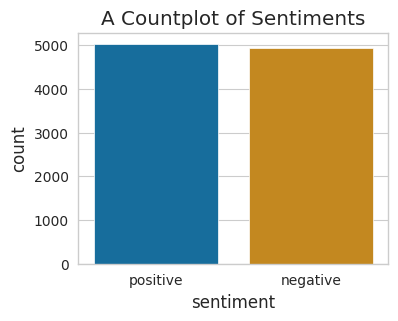

In [11]:
plt.figure(figsize = (4,3))
sns.set_palette('colorblind')
sns.set_style('whitegrid')
sns.countplot(data = reviews_df, x = 'sentiment')
plt.title("A Countplot of Sentiments")
plt.show()

From the above, we can see that the number of positive and negative sentiments is around the same. Next, we will have a look at the distribution of `polarity` scores and `subjectivity` scores.

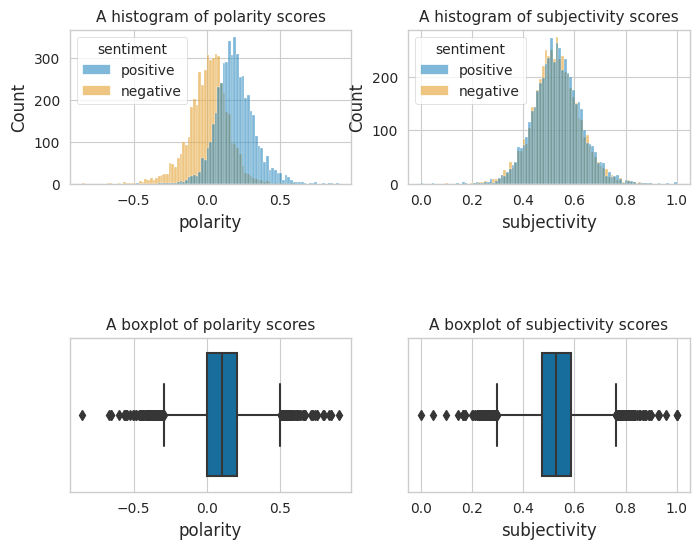

In [12]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.histplot(data = reviews_df, x = 'polarity', ax = ax[0,0], hue = 'sentiment', alpha = 0.5)
ax[0,0].set_title("A histogram of polarity scores", fontsize = 11)
sns.histplot(data = reviews_df, x = 'subjectivity', ax = ax[0,1], hue = 'sentiment', alpha = 0.5)
ax[0,1].set_title("A histogram of subjectivity scores", fontsize = 11)
sns.boxplot(data = reviews_df, x = 'polarity', ax = ax[1,0])
ax[1,0].set_title("A boxplot of polarity scores", fontsize = 11)
sns.boxplot(data = reviews_df, x = 'subjectivity', ax = ax[1,1])
ax[1,1].set_title("A boxplot of subjectivity scores",fontsize = 11)
plt.subplots_adjust(hspace=1)
plt.show()

From the above, we can see that generally, the `polarity` scores of `review`s categorized as positive are higher than those of `review`s categorized as negative. It is worth noting however thayt there is a substantial overlap between the polarity scores of the two categories.

The `subjectivity` scores of either categories have a similar distribution as shown in the histogram on `subjectivity`, with a median of about 0.5 as shown in the boxplot on `subjectivity` scores.

## Most positive and most negative reviews

In [13]:
most_positive = reviews_df.loc[reviews_df['polarity'].idxmax()]
most_negative = reviews_df.loc[reviews_df['polarity'].idxmin()]
print(f"The most positive review is: {most_positive['review']}")
print("\n")
print(f"The most negative review is: {most_negative['review']}")

The most positive review is: brilliant and moving performances by tom courtenay and peter finch


The most negative review is: sophia loren plays aida in one of the worst films of all time she cant lipsync in terms of production values the film is so bad that at one point while loren is mouthing o patria mia she leans onto what looks to be a stone wall for support and the canvas set billows and shakes


As it can be seen in the above texts, the most positive review is indeed truly positive and the most negative - well, that too is extraordinary in that context.

## Polarity vs Subjectivity

In [14]:
# checking the correlation between subjectivity and polarity
print(f"The correlation matrix of polarity scores and subjectivity scores is: \n{np.corrcoef(reviews_df.polarity, reviews_df.subjectivity)}")

The correlation matrix of polarity scores and subjectivity scores is: 
[[1.         0.04880274]
 [0.04880274 1.        ]]


The correlation between `polarity` scores and `subjectivity` scores appear to have a very small correlation. Next, we will visualize this relationship with a scatterplot.

### A scatterplot of subjectivity vs polarity

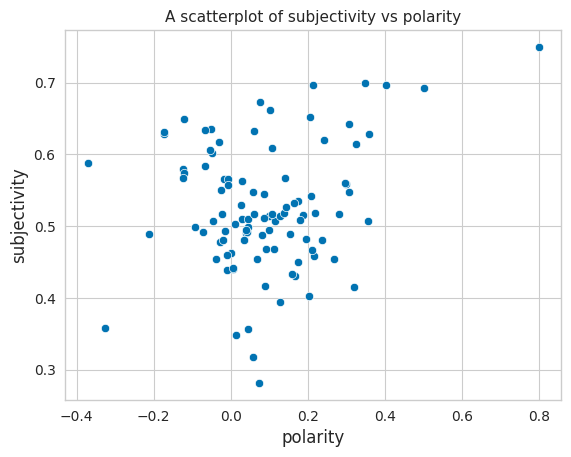

In [15]:
sns.scatterplot(data = reviews_df.sample(frac = 0.01, random_state = 42), x = 'polarity', y = 'subjectivity')
plt.title("A scatterplot of subjectivity vs polarity", fontsize = 11)
plt.show()

The scatter plot confirms the small correlation value that we obtained before. 

## Noun Phrase Extraction

In [16]:
tqdm.pandas()
reviews_df['noun_phrases'] = reviews_df['review'].progress_apply(lambda x: TextBlob(x).noun_phrases)

  0%|          | 0/9978 [00:00<?, ?it/s]

In [17]:
from collections import Counter

positive_reviews = reviews_df[reviews_df['sentiment'] == 'positive']
negative_reviews = reviews_df[reviews_df['sentiment'] == 'negative']

all_positive_noun_phrases = [np for sublist in positive_reviews['noun_phrases'] for np in sublist]
all_negative_noun_phrases = [np for sublist in negative_reviews['noun_phrases'] for np in sublist]

common_positive_nouns = Counter(all_positive_noun_phrases).most_common(50)
common_negative_nouns = Counter(all_negative_noun_phrases).most_common(50)

print(f"The most common noun phrases in positive reviews are:\n\n{common_positive_nouns}")
print("\n")
print(f"The most common noun phrases in negative reviews are:\n\n{common_negative_nouns}")

The most common noun phrases in positive reviews are:

[('i dont', 212), ('movie i', 178), ('time i', 159), ('film i', 126), ('new york', 101), ('great movie', 94), ('i cant', 92), ('special effects', 92), ('i didnt', 90), ('good movie', 85), ('great job', 81), ('great film', 80), ('good job', 80), ('real life', 67), ('long time', 66), ('main characters', 60), ('early s', 55), ('main character', 53), ('good film', 53), ('late s', 53), ('i hope', 52), ('true story', 48), ('young man', 47), ('high school', 46), ('i havent', 46), ('i guess', 43), ('big screen', 42), ('old man', 42), ('whole movie', 39), ('i couldnt', 38), ('thing i', 38), ('bad guys', 37), ('big fan', 36), ('great story', 36), ('young woman', 33), ('low budget', 32), ('screen time', 32), ('horror film', 31), ('whole thing', 31), ('good i', 30), ('story line', 30), ('i wasnt', 29), ('final scene', 29), ('great performance', 29), ('good time', 28), ('movies i', 27), ('small town', 27), ('academy award', 27), ('times i', 27)

Some of the most common noun phrases present in positive reviews and are in reality an indicator of positive sentiments include; great movie, good movie, great film and great job.

On the other hand, some of the most common noun phrases in negative reviews are; bad movie, whole movie, whole thing, entire movie and low budget. Apparently, it appears people are likely to talk about the entire movie when they have something negative to comment about it.

Most of the positive reviews do not have phrases that are suggestive of recommendation to watch the a movie whereas a number of the negative reviews have phrases that seem to admonish people against watching the movies. These include; n't care, n't waste, good thing, avoid, n't work, anyway and n't bother.

Positive reviews appear to have more noun phrases for locations such as America, Paris, London, Earth, France, England and York. On the other hand, the only noun phrases for locations appearing in negative reviews are America and York.

There seems to be mentioning of actors in positive reviews as indicated by names such as Jack, Joe, Michael etc whereas that is lacking in negative reviews. The same applies to movie titles, in positive reviews, we have names such as Batman, World war and Shakespeare whereas they are missing in the negative reviews.



### Checking languages
Have all reviews been done in English?

In [18]:
!pip install langdetect
from langdetect import detect
reviews_df['language'] = reviews_df['review'].apply(lambda x: detect(x))
reviews_df.columns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=10afc4e5274952993e6c695f374188b3a2c2c869e98468b1c39260c136a4bd36
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


Index(['review', 'sentiment', 'polarity', 'subjectivity', 'noun_phrases',
       'language'],
      dtype='object')

In [19]:
reviews_df['language'].unique()


array(['en'], dtype=object)

It turns out that all reviews are in english according to `langdetect`

### Extracting mostly used adjectives


In [20]:
def adjective_detector(text):
    text_blob = TextBlob(text)
    return [word for word, pos in text_blob.tags if pos == 'JJ']

In [21]:
positive_reviews['adjective'] = positive_reviews['review'].progress_apply(adjective_detector)
negative_reviews['adjective'] = negative_reviews['review'].progress_apply(adjective_detector)

  0%|          | 0/5035 [00:00<?, ?it/s]

  0%|          | 0/4943 [00:00<?, ?it/s]